<a href="https://colab.research.google.com/github/DOMINION-JOHN1/voting_eligibility_model/blob/main/preprocessing_of_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Define the file path of the np.array document
file_path = '/content/drive/My Drive/.npy'

# Load the np.array document using np.load()
loaded_array = np.load(file_path)

In [ ]:
import tensorflow as tf

x=loaded_array


In [ ]:
eligibility=pd.read_csv('/content/drive/My Drive/eligibility.csv')

In [ ]:

eligibility['eligibility']=eligibility['eligibility'].replace('55', 'Eligible')
eligibility['eligibility']=eligibility['eligibility'].replace('35', 'Eligible')
eligibility['eligibility'] = eligibility['eligibility'].replace({'Eligible': 1, 'Not Eligible': 0})
target_label = np.array(eligibility['eligibility'])
target_label.astype('float32')
target_label.shape
y=target_label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 10850
Testing data size: 2713


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the feature map
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Define the file path for saving the best model
checkpoint_filepath = '/content/drive/My Drive/best_model.h5'

# Create callbacks
checkpointer = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=1e-6)

epochs = 100
batch_size = 30


# Fit the model with callbacks
hist = model.fit( datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[checkpointer, early_stopping, reduce_lr],
    verbose=2
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.61860, saving model to /content/drive/My Drive/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 - 77s - loss: 0.7461 - accuracy: 0.6465 - val_loss: 0.6186 - val_accuracy: 0.7331 - lr: 0.0010 - 77s/epoch - 212ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.61860 to 0.57917, saving model to /content/drive/My Drive/best_model.h5
361/361 - 54s - loss: 0.6324 - accuracy: 0.7038 - val_loss: 0.5792 - val_accuracy: 0.7346 - lr: 0.0010 - 54s/epoch - 149ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.57917 to 0.57776, saving model to /content/drive/My Drive/best_model.h5
361/361 - 55s - loss: 0.6051 - accuracy: 0.7226 - val_loss: 0.5778 - val_accuracy: 0.7346 - lr: 0.0010 - 55s/epoch - 152ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.57776
361/361 - 55s - loss: 0.5914 - accuracy: 0.7301 - val_loss: 0.5830 - val_accuracy: 0.7320 - lr: 0.0010 - 55s/epoch - 154ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.57776 to 0.57244, saving model to /content/drive/My Drive/best_model.h5
361/361 - 56s - loss: 0.5841 - accuracy: 0.7332 - val_loss: 0.5724 - va

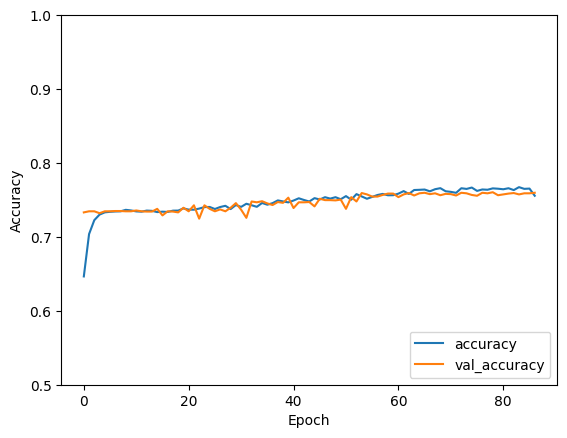

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')